<a href="https://colab.research.google.com/github/tiitvaino/NAI22_hand_drawn_sketches/blob/main/initial_model/initial_model_karl_johan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [52]:
from shapely.geometry import Point, LineString, MultiLineString

In [101]:
data1 = np.load('sketchrnn_airplane.npz', encoding='latin1', allow_pickle=True)
data2 = np.load('sketchrnn_The Eiffel Tower.npz', encoding='latin1', allow_pickle=True)

In [105]:
import random

indexes = list(range(2000))

random.shuffle(indexes)

data1_i = indexes[:1000]
data2_i = indexes[1000:]
print(data1_i)
print(data2_i)

[1461, 1486, 771, 886, 1513, 863, 171, 96, 1182, 1551, 1377, 359, 397, 161, 1805, 1246, 270, 540, 925, 1626, 708, 1113, 757, 35, 225, 1089, 1186, 1264, 1729, 1260, 1007, 857, 913, 1969, 680, 314, 841, 634, 388, 1505, 936, 224, 101, 1107, 1137, 1940, 1057, 195, 1216, 465, 481, 1006, 1708, 638, 998, 1055, 1606, 316, 1842, 1436, 1560, 825, 840, 1392, 582, 699, 794, 205, 275, 431, 742, 1813, 58, 1913, 652, 201, 319, 1748, 577, 355, 128, 212, 1882, 1222, 983, 943, 940, 906, 1788, 878, 448, 264, 948, 17, 1110, 127, 785, 1049, 1141, 716, 1238, 1008, 294, 1817, 1329, 1212, 1933, 1594, 1180, 1475, 1587, 1072, 1507, 873, 303, 1510, 1691, 1067, 1125, 120, 1412, 69, 827, 551, 919, 132, 514, 800, 888, 1337, 370, 1759, 1925, 945, 1136, 1880, 745, 1668, 9, 1458, 1262, 1231, 547, 344, 1972, 631, 1911, 584, 1677, 1417, 1293, 599, 104, 1644, 187, 276, 110, 1300, 1423, 1069, 1696, 1354, 917, 961, 1100, 534, 1320, 1664, 288, 641, 460, 860, 1695, 1278, 1778, 1129, 1947, 1401, 1857, 1224, 942, 1131, 885, 36

In [107]:
sizes = []
for i in data1['test']:
  sizes.append(i.shape[0])

print(max(sizes))
print(data1['test'].shape)
print(data2['test'].shape)

99
(2500,)
(2500,)


In [164]:
X = []
y = []
i_1 = 0
i_2 = 0

for i in range(2000):
  if i in data1_i:
    sketch = data1['test'][i_1]
    for j in range(100-sketch.shape[0]):
      sketch = np.concatenate((np.zeros((1,3), dtype=int), sketch))
    X.append(sketch)
    y.append([0])
    i_1 += 1
  else:
    sketch = data2['test'][i_2]
    for j in range(100-sketch.shape[0]):
      sketch = np.concatenate((np.zeros((1,3), dtype=int), sketch))
    X.append(sketch)
    y.append([1])
    i_2 += 1

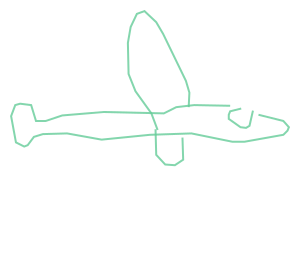

In [90]:
ls = []
lines = []
last = (0, 0)
for i in data1['test'][0]:
  if i[2]:
    ls.append((last[0]-i[0], last[1]-i[1]))
    lines.append(LineString(ls))
    ls = []
    #ls = [(last[0]+i[0], last[1]+i[1])]
    last = (last[0]-i[0], last[1]-i[1])
  else:
    ls.append((last[0]-i[0], last[1]-i[1]))
    last = (last[0]-i[0], last[1]-i[1])

MultiLineString(lines)

In [152]:
# create a sequence classification instance
def get_sequence(n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = array([random.random() for _ in range(n_timesteps)])
    # calculate cut-off value to change class values
    limit = n_timesteps/4.0
    # determine the class outcome for each item in cumulative sequence
    y = array([0 if x < limit else 1 for x in cumsum(X)])
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

In [160]:
# define problem properties
n_timesteps = 3
# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# train LSTM
for epoch in range(1000):
    # generate new random sequence
    X_x,y_y = get_sequence(n_timesteps)
    #print(X_x)
    # fit model for one epoch on this sequence
    model.fit(X_x, y_y, epochs=1, batch_size=1, verbose=0)
# evaluate LSTM
X_x,y_y = get_sequence(n_timesteps)
predict_x=model.predict(X_x) 
#classes_x=np.argmax(predict_x,axis=1)

for i in range(n_timesteps):
    print('Expected:', y_y[0, i], 'Predicted', predict_x[0, i])


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_53 (Bidirecti  (None, 3, 40)            3520      
 onal)                                                           
                                                                 
 time_distributed_19 (TimeDi  (None, 3, 1)             41        
 stributed)                                                      
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: ignored

In [173]:
X = np.array(X)
y = np.array(y)
X.shape

(2000, 100, 3)

In [177]:
model = Sequential()
model.add(Bidirectional(LSTM(1024), input_shape=(100, 3))) # biLSTM two layer
#model.add(Bidirectional(LSTM(1024))), return_sequences=True
model.add(Dense(2048)) # MLP 2048-1024-345
model.add(Dense(1024))
#model.add(Dense(345)) # , activation='custom'
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X, y, epochs=10, batch_size=128)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_67 (Bidirecti  (None, 2048)             8421376   
 onal)                                                           
                                                                 
 dense_77 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_78 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_79 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 14,716,929
Trainable params: 14,716,929
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 332s 166ms/sample - loss: 8.1